<a href="https://colab.research.google.com/github/AhmedSafwatMohamed/Predictive-Maintenance-for-Vehicle-Health/blob/main/notebooks/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**

The purpose from notebook is  to loadthe the raw data and understand its structure.

# **Import libraries**

In [1]:

import pandas as pd          # For loading and manipulating data
import numpy as np           # For numerical operations

import matplotlib.pyplot as plt    # Basic plotting
import seaborn as sns              # Advanced statistical plots

import warnings
warnings.filterwarnings('ignore')  # To suppress warnings

from sklearn.preprocessing import LabelEncoder # To lable encode the catogrical variables


%matplotlib inline
# For displaying plots inline in Jupyter Notebook

# **Load and preview the dataset**

In [2]:
# Load the data into a DataFrame
df = pd.read_csv(
    'https://raw.githubusercontent.com/AhmedSafwatMohamed/Predictive-Maintenance-for-Vehicle-Health/main/data/raw-data.csv'
)

# Preview the DataFrame
df.head()


,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Type,...,Brake_Condition,Failure_History,Anomalies_Detected,Predictive_Score,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
0,1,Ford F-150,2022,Truck,530,Rural,7.534549,9.004247,2023-04-09,Oil Change,...,Good,1,0,0.171873,1,Clear,Highway,30.000000,0.093585,0.150063
1,2,Volvo FH,2015,Van,10679,Rural,7.671728,6.111785,2023-07-20,Tire Rotation,...,Fair,1,0,0.246670,1,Clear,Rural,30.000000,3.361201,0.343017
2,3,Chevy Silverado,2022,Van,4181,Rural,2.901159,3.006055,2023-03-17,Oil Change,...,Good,1,1,0.455236,1,Clear,Highway,48.627823,1.365300,0.100000
3,4,Chevy Silverado,2011,Truck,2974,Urban,15.893347,18.825290,2024-05-01,Tire Rotation,...,Good,0,1,0.060208,1,Clear,Highway,30.000000,0.000000,0.135749
4,5,Ford F-150,2014,Van,2539,Rural,60.668320,65.605463,2023-11-15,Tire Rotation,...,Good,1,1,0.264929,1,Rainy,Urban,300.000000,6.608704,0.395193


# **Explor the dataframe **

In [3]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (92000, 27)


In [4]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92000 entries, 0 to 91999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vehicle_ID             92000 non-null  int64  
 1   Make_and_Model         92000 non-null  object 
 2   Year_of_Manufacture    92000 non-null  int64  
 3   Vehicle_Type           92000 non-null  object 
 4   Usage_Hours            92000 non-null  int64  
 5   Route_Info             92000 non-null  object 
 6   Load_Capacity          92000 non-null  float64
 7   Actual_Load            92000 non-null  float64
 8   Last_Maintenance_Date  92000 non-null  object 
 9   Maintenance_Type       92000 non-null  object 
 10  Maintenance_Cost       92000 non-null  float64
 11  Engine_Temperature     92000 non-null  float64
 12  Tire_Pressure          92000 non-null  float64
 13  Fuel_Consumption       92000 non-null  float64
 14  Battery_Status         92000 non-null  float64
 15  Vi

In [5]:
# Basic statistical summary
df.describe()

,Vehicle_ID,Year_of_Manufacture,Usage_Hours,Load_Capacity,Actual_Load,Maintenance_Cost,Engine_Temperature,Tire_Pressure,Fuel_Consumption,Battery_Status,Vibration_Levels,Oil_Quality,Failure_History,Anomalies_Detected,Predictive_Score,Maintenance_Required,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
count,92000.00000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.0,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000
mean,46000.50000,2016.968478,2989.550913,25.068001,23.771355,1043.004745,120.0,32.570643,10.657493,45.669862,3.977629,79.930316,0.399565,0.452196,0.166754,0.767989,99.283161,3.210282,0.208325
std,26558.25672,5.359597,2992.083426,25.040153,24.194555,1575.109426,0.0,14.483096,5.979493,1.634766,4.003637,9.794350,0.489812,0.497712,0.103435,0.422118,79.708201,6.429751,0.111234
min,1.00000,2005.000000,0.000000,0.000013,0.000010,100.002837,120.0,20.000000,5.000000,45.000000,0.000370,38.303330,0.000000,0.000000,0.000161,0.000000,30.000000,0.000000,0.100000
25%,23000.75000,2013.000000,856.000000,7.233425,6.725843,225.213756,120.0,20.000000,5.000000,45.000000,1.135643,73.319542,0.000000,0.000000,0.087777,1.000000,30.000000,0.000000,0.106637
50%,46000.50000,2020.000000,2070.000000,17.401696,16.245317,348.722087,120.0,24.516540,8.349716,45.000000,2.760726,80.013201,0.000000,0.000000,0.147868,1.000000,69.617815,0.000000,0.179359
75%,69000.25000,2021.000000,4146.000000,34.746243,32.681695,474.925612,120.0,48.810813,16.678173,45.000000,5.498541,86.750897,1.000000,1.000000,0.227352,1.000000,139.084008,3.775145,0.271323
max,92000.00000,2022.000000,36392.000000,332.341562,264.033718,5999.905095,120.0,55.000000,20.000000,50.000000,45.475464,100.000000,1.000000,1.000000,0.746450,1.000000,300.000000,88.624732,0.822859


In [6]:
# Basic objective data summary
df.describe(include='object')

,Make_and_Model,Vehicle_Type,Route_Info,Last_Maintenance_Date,Maintenance_Type,Brake_Condition,Weather_Conditions,Road_Conditions
count,92000,92000,92000,92000,92000,92000,92000,92000
unique,4,2,3,547,3,3,4,3
top,Ford F-150,Van,Highway,2023-03-26,Oil Change,Good,Clear,Highway
freq,45917,50850,46052,219,41488,45938,73482,36861


In [7]:
# Loop through all object-type columns and show unique values
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Unique values: {df[col].unique()[:10]}")  # Show only first 10 unique values
    print("-" * 40)

Column: Make_and_Model
Number of unique values: 4
Unique values: ['Ford F-150' 'Volvo FH' 'Chevy Silverado' 'Tesla Semi']
----------------------------------------
Column: Vehicle_Type
Number of unique values: 2
Unique values: ['Truck' 'Van']
----------------------------------------
Column: Route_Info
Number of unique values: 3
Unique values: ['Rural' 'Urban' 'Highway']
----------------------------------------
Column: Last_Maintenance_Date
Number of unique values: 547
Unique values: ['2023-04-09' '2023-07-20' '2023-03-17' '2024-05-01' '2023-11-15'
 '2023-07-13' '2023-10-29' '2023-10-22' '2024-03-29' '2023-06-05']
----------------------------------------
Column: Maintenance_Type
Number of unique values: 3
Unique values: ['Oil Change' 'Tire Rotation' 'Engine Overhaul']
----------------------------------------
Column: Brake_Condition
Number of unique values: 3
Unique values: ['Good' 'Fair' 'Poor']
----------------------------------------
Column: Weather_Conditions
Number of unique values: 

In [8]:
# Count and show duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [9]:
# Count how many rows require maintenance vs. not
df['Maintenance_Required'].value_counts(normalize=True) * 100

,proportion
Maintenance_Required,
1,76.798913
0,23.201087


# *Correlations *

In [10]:
# Copy the DataFrame so original isn't changed
df_encoded = df.copy()

# Encode object-type columns
label_encoders = {}
for col in df_encoded.select_dtypes(include='object'):
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # Store encoder if needed later


In [11]:
# Get correlation of all (encoded) features with Maintenance_Required
correlations_all = df_encoded.corr()['Maintenance_Required'].sort_values(ascending=False)

correlations_all

,Maintenance_Required
Maintenance_Required,1.000000
Anomalies_Detected,0.499375
Failure_History,0.448371
Brake_Condition,0.302963
Downtime_Maintenance,0.274428
Impact_on_Efficiency,0.007060
Last_Maintenance_Date,0.005610
Fuel_Consumption,0.005376
Vehicle_ID,0.002619
Make_and_Model,0.001608


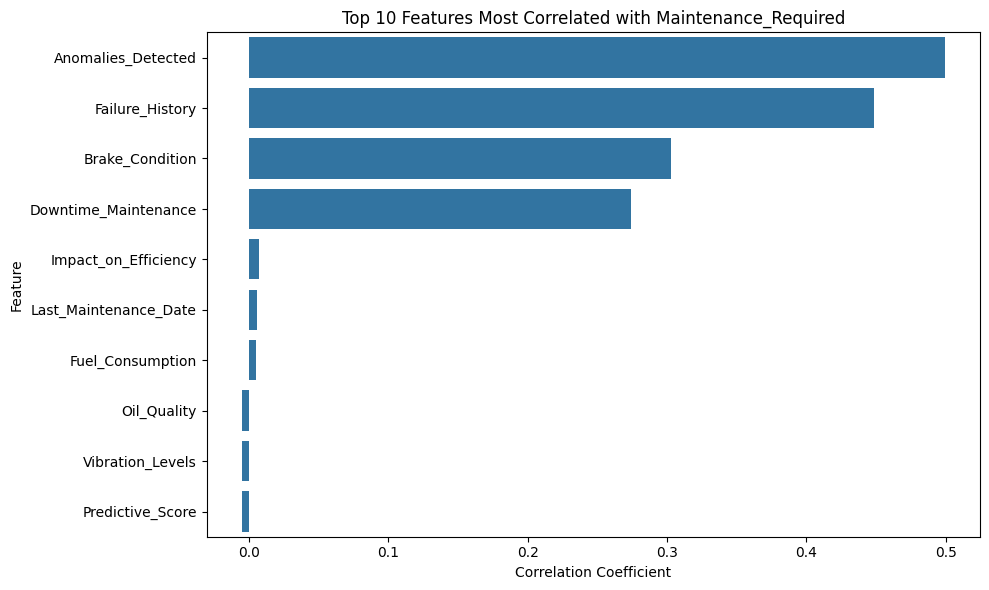

In [12]:
top_corr_features = correlations_all.drop('Maintenance_Required').abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_all[top_corr_features], y=top_corr_features)
plt.title("Top 10 Features Most Correlated with Maintenance_Required")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# **Insights and recommendations **

76.8% of the vehicles in the dataset are labeled as requiring maintenance.
Only 23.2% do not require maintenance.
This reveals a significant class imbalance, which must be addressed before training a classification model to avoid biased predictions.

Most features show very weak linear correlation with the target variable Maintenance_Required.
Specifically, 20 out of 25 numerical features have correlation coefficients between -0.01 and 0.01.
This suggests that individual features may not be strongly predictive alone — and that the relationships with the target may be non-linear or dependent on feature interactions.

• The column 'Engine_Temperature Engine_Temperature' has the same constant value (120) across all rows — it provides no information and should be removed.
• The 'Last_Maintenance_Date Last_Maintenance_Date' column is a raw datetime string and should be split into separate features like day, month, and year to improve its utility.
• Several columns are categorical and will need proper encoding (e.g., Label Encoding or One-Hot Encoding) based on the model used.

• Use non-linear models such as Random Forest or XGBoost, which are more capable of capturing complex feature interactions.
• Address the class imbalance using techniques like SMOTE, random oversampling, or class weighting.
• Use feature importance analysis (e.g., .feature_importances_, SHAP values) to better understand which features contribute to maintenance prediction.
• Continue iterative feature engineering and model tuning in later steps to improve performance.